In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
import re
import string
import re, nltk,string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet
# nltk.download("punkt")
# nltk.download('punkt_tab')
# nltk.download("wordnet")
# nltk.download("omw-1.4")
# nltk.download("stopwords")
# nltk.download('averaged_perceptron_tagger')
# nltk.download('averaged_perceptron_tagger_eng')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

In [3]:
df = pd.read_excel('/content/DA -Task 2..xlsx')



In [4]:
df.shape

(100, 52)

# Data-Preprocessing(Column-Wise Analysis)

### Identification & Transaction Info

**VIN**
- Vehicle Identification Number (unique ID for each vehicle).
- Helps identify the exact vehicle repaired.

**TRANSACTION_ID**
- Unique ID for each repair transaction.
- Primary key for the record.

**SRC_TXN_ID**
- Source system transaction ID (from original system).
- Used for data integration and traceability.

**SRC_VER_NBR**
- Source system version number of the record.
- Tracks updates or changes to the repair record.

**TRANSACTION_CNTR**
- Represents the count of transactions tied to that claim or repair event.
- Here each record is one full transaction

### Text & Verbatim Info

**CORRECTION_VERBATIM**
- Technician’s written description of the fix performed.
- Useful for text analytics to identify repair patterns.

**CUSTOMER_VERBATIM**
- Customer’s own words describing the issue.
- Useful for complaint classification, customer insights.

### Repair Details

**REPAIR_DATE**
- Date of repair.
- Enables trend analysis, seasonal patterns, warranty age calculation.

**REPAIR_AGE**
- Vehicle age (in months or days) at repair time.
- Crucial for reliability or warranty analysis.

**KM**
- Odometer reading at repair time (in kilometers).
- Useful for wear-and-tear, usage pattern analysis.

### Parts & Labor

**CAUSAL_PART_NM**
- Part identified as root cause of failure.
- Key for root cause analysis & supplier accountability.

**NON_CAUSAL_PART_QTY**
- Number of non-causal parts replaced during repair.
- Helps track over-repairs or related parts replacement.

**GLOBAL_LABOR_CODE**
- Code for type of labor performed.
- Standardized classification of repair work.

**GLOBAL_LABOR_CODE_DESCRIPTION**
- Human-readable description of labor code.
- Makes labor data understandable to stakeholders.

**TRANSACTION_CATEGORY**
- Type of transaction (e.g., warranty, recall, goodwill).
- Important for financial tracking.

**CAMPAIGN_NBR**
- Campaign or recall ID (if repair linked to official campaign).
- Links repairs to recalls/service programs.

## Cost Information

**REPORTING_COST**
- Reported repair cost.
- For accounting or warranty cost tracking.

**LBRCOST**
- Labor cost of the repairing or replacement.

**TOTALCOST**
- Total cost of repair.
- Key metric for cost control.

## Vehicle Info

**PLATFORM**
- Vehicle platform (e.g., compact SUV, sedan platform).
- Groups models built on same base design.

**BODY_STYLE**
- Body style (e.g., sedan, hatchback, SUV).
- Market classification, affects repair trends.

**VPPC**
- Vehicle Product Program Code (internal classification).
- Links to product program strategy.

**ENGINE**
- Engine code of model.
- Technical detail, useful for analyzing engine failures.

**ENGINE_DESC**
- Engine description (e.g., 2.0L Turbo Petrol).
- Readable engine detail.

**TRANSMISSION**
- Transmission code of model.
- Technical detail for failure analysis.

**TRANSMISSION_DESC**
- Transmission description (e.g., 6-speed Automatic).
- Readable transmission detail.

**VIN_MODL_DESGTR**
- Model designation from VIN.
- Helps decode VIN into specific model variant.

**LINE_SERIES**
- Vehicle line/series (e.g., Civic, Accord).
- High-level grouping of vehicle models.

## Manufacturing Details

**PLANT**
- Manufacturing plant where the vehicle was built.
- Useful for quality tracking by plant.

**BUILD_COUNTRY**
- Country where vehicle was manufactured.
- For regulatory and regional quality analysis.

**ENGINE_SOURCE_PLANT**
- Plant that produced the engine.
- Tracks supplier and manufacturer responsibility.

**ENGINE_TRACE_NBR**
- Traceability number for engine.
- Helps track back to production batch.

**TRANSMISSION_SOURCE_PLANT**
- Plant that produced the transmission.
- For transmission failure analysis.

**TRANSMISSION_TRACE_NBR**
- Transmission traceability number.
- Helps identify batch-level defects.

## Dealer & Sales Details

**LAST_KNOWN_DLR_NAME**
- Last known dealer linked to this vehicle.
- Customer touchpoint info.

**LAST_KNOWN_DLR_CITY**
- City of last known dealer.

**REPAIRING_DEALER_CODE**
- Code of dealer who did the repair.
- Links to service center performance.

**DEALER_NAME**
- Repairing dealer’s name.

**REPAIR_DLR_CITY**
- City of repairing dealer.

**STATE**
- State of repairing dealer.

**DEALER_REGION**
- Region of repairing dealer (e.g., West, North).

**REPAIR_DLR_POSTAL_CD**
- Postal code of repair dealer.

**SALES_REGION_CODE**
- Sales region code.
- Used for market-based analysis.

**LAST_KNOWN_DELVRY_TYPE_CD**
- Last known delivery type (e.g., dealer delivery, customer direct).

### Complaints & Symptoms

**COMPLAINT_CD_CSI**
- Complaint code used for customer satisfaction index.
- Standardized complaint classification.

**COMPLAINT_CD**
- General complaint code.
- Broader classification of issues.

**VEH_TEST_GRP**
- Vehicle test group (emission/market classification).
- Used for regulatory reporting.

**OPTN_FAMLY_CERTIFICATION**
- Certification option family (e.g., emissions compliance).

**OPTF_FAMLY_EMISSIOF_SYSTEM**
- Emission system option family.

### Flags & Indicators

**MEDIA_FLAG**
- Indicator if repair was flagged in media monitoring.
- Useful for brand risk management.

## Checking null values, duplicates, unique values and datatypes of all columns

In [5]:
df.isnull().sum()

,0
VIN,0
TRANSACTION_ID,0
CORRECTION_VERBATIM,0
CUSTOMER_VERBATIM,0
REPAIR_DATE,0
CAUSAL_PART_NM,5
GLOBAL_LABOR_CODE_DESCRIPTION,0
PLATFORM,0
BODY_STYLE,0
VPPC,0


## <span style="color:darkred">📌 Observation</span>
- **'CAMPAIGN_NBR ' has 100 percent missing data so will remove this column as it is not giving any insights.**

In [6]:
df.drop(columns=['CAMPAIGN_NBR'],inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
# No duplicates in dataset

In [9]:
for i in df:
    print(i)
    print()
    print(df[i].unique())
    print()
    print(f'Total Unique Values: {df[i].nunique()}')
    print()
    print('*'*100)
    print(end='\n\n')

VIN

['3HCFDDE89SH220903' '1HRFFEE8XSZ230636' '1HYKSMRK6SZ000990'
 '3HCFDFEL3SH241701' '1HRFFHEL1RZ181474' '3HRFFHED7RH167541'
 '1HRFFHEL4RZ149960' '3HCFDFED4SH352945' '1HRF9CED6NZ221061'
 '1HRFFHEL8RZ133325' '1HCFDHE86SZ274242' '1HYKNDRS3MZ177921'
 '1HYKSMRK4SZ001121' '1H6DS5RK6S0127345' '1HC4YSEY3RF110164'
 '1HKS1JKL0SR282668' '1HC4Y9EY2MF192148' '1H1FZ6S00N4109597'
 '1HNEVKKW6SJ216435' '1HR49WEY2NF322460' '3HRFFCER3NH528824'
 '1HYKNDR46NZ151056' '1HNEVNKW4SJ144359' '3HRS9EED0LH255650'
 '1HKS2JKR2NR336997' '1HCFDEED3SZ308171' '1HYKNHRS1LZ157005'
 '1HCFYEED6NZ182017' '1HCFDEED5SZ117691' '3HNKBHRS8SS220860'
 '1HR49SE7XRF103023' '3HRFFEE82RH175165' '3HCND9ED5SH144160'
 '1HYKSSRL1RZ101481' '1HR49REY4SF251024' '3HCFDFED5SH364828'
 '2HC4YSEY1S1701193' '1HKS2JKL9MR285352' '1HNSKRKD0RR120386'
 '1HCFDEER5NZ580922' '1HRS9EED3MZ313803' '2HCFDEED4R1147650'
 '1HR49XEY0RF190021' '1HR19SEY5RF265525' '1HCFYEEL0NZ210174'
 '1HCFDEED0NZ543303' '1HCRYDED2NZ208869' '5HAERBKW0LJ197079'
 '1HYKSDRS0SZ164445

## <span style="color:darkred">📌 Observation</span>
- Removing 'COMPLAINT_CD_CSI' and 'TRANSACTION_CNTR' as there is only one values so it won't affect the analysis if doing further.
- COMPLAINT_CD_CSI represents complaint code for customer satisfaction index and TRANSACTION_CNTR represents that each record is one full transaction.

In [10]:
df.drop(columns=['COMPLAINT_CD_CSI'],inplace=True)
df.drop(columns=['TRANSACTION_CNTR'],inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 49 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  BUILD_COUNTRY       

In [12]:
df.head()

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_SOURCE_PLANT,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,287827.0,S2210121CNJX0941,2808908219,6,N,CF10543,1500,21.0,0,1
1,1HRFFEE8XSZ230636,13028,CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM...,CUSTOMER STATES HEATED STEERING WHEEL INOP,2024-01-03,MODULE ASM-STRG WHL HT CONT,Heated Steering Wheel Module Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,17749294.0,R2210881CNJX0287,2808841910,6,Y,TF10543,1500,10.0,0,1
2,1HYKSMRK6SZ000990,13035,APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH T...,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STE...,2024-01-04,WHEEL ASM-STRG *BACKEN BLACKK,Steering Wheel Replacement,BEV,4 Door Utility,L233-LSOP,...,NaN,NaN,2809979441,4,Y,6MB26,Lux-1,10.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CCF,...,287827.0,S1210822CKJX0291,2808892288,6,Y,CF10543,1500,10.0,0,1
4,1HRFFHEL1RZ181474,13021,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,Full-Size Trucks,Crew Cab,T1CGF,...,17749294.0,R2212982CKJX0282,2808901882,8,N,TF10543,1500,10.0,0,1


In [13]:
df['TRANSACTION_ID'] = df['TRANSACTION_ID'].astype('object')
df['SRC_TXN_ID'] = df['DEALER_REGION'].astype('object')

In [14]:
cat_cols = []
num_cols = []
for i in df.columns:
    if df[i].dtype not in ['object','datetime64[ns]']:
        if df[i].nunique() <= 15:
            df[i] = df[i].astype('category')
            cat_cols.append(i)
        else:
            num_cols.append(i)
    elif df[i].dtype == 'object':
        if df[i].nunique() <= 15:
            cat_cols.append(i)
        else:
            pass
    else:
        pass

In [15]:
print('Categorical cols: ',cat_cols)
print()
print('*'*100)
print()
print('Numerical cols: ',num_cols)

Categorical cols:  ['GLOBAL_LABOR_CODE_DESCRIPTION', 'PLATFORM', 'BODY_STYLE', 'PLANT', 'BUILD_COUNTRY', 'DEALER_REGION', 'COMPLAINT_CD', 'COUNTRY_SALE_ISO', 'ORD_SELLING_SRC_CD', 'OPTN_FAMLY_CERTIFICATION', 'OPTF_FAMLY_EMISSIOF_SYSTEM', 'GLOBAL_LABOR_CODE', 'TRANSACTION_CATEGORY', 'ENGINE', 'ENGINE_DESC', 'ENGINE_SOURCE_PLANT', 'TRANSMISSION_SOURCE_PLANT', 'SRC_TXN_ID', 'SRC_VER_NBR', 'MEDIA_FLAG', 'LAST_KNOWN_DELVRY_TYPE_CD', 'NON_CAUSAL_PART_QTY', 'SALES_REGION_CODE']

****************************************************************************************************

Numerical cols:  ['REPAIR_AGE', 'KM', 'REPORTING_COST', 'TOTALCOST', 'LBRCOST']


In [16]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
REPAIR_AGE,100.0,14.940000,12.367945,0.00,5.0000,12.000,21.0000,50.00
KM,100.0,24914.230000,20747.078206,3.00,8883.2500,21962.000,35493.2500,107905.00
REPORTING_COST,100.0,531.193200,411.161608,27.69,305.4325,433.970,554.0625,2457.45
TOTALCOST,94.0,561.162128,452.796836,27.69,320.1050,457.225,606.9050,3205.45
LBRCOST,100.0,106.344900,113.223074,20.00,61.8550,78.560,108.0550,1012.67


# EDA (Exploratory Data Analysis)

## Distribution of Numerical Features

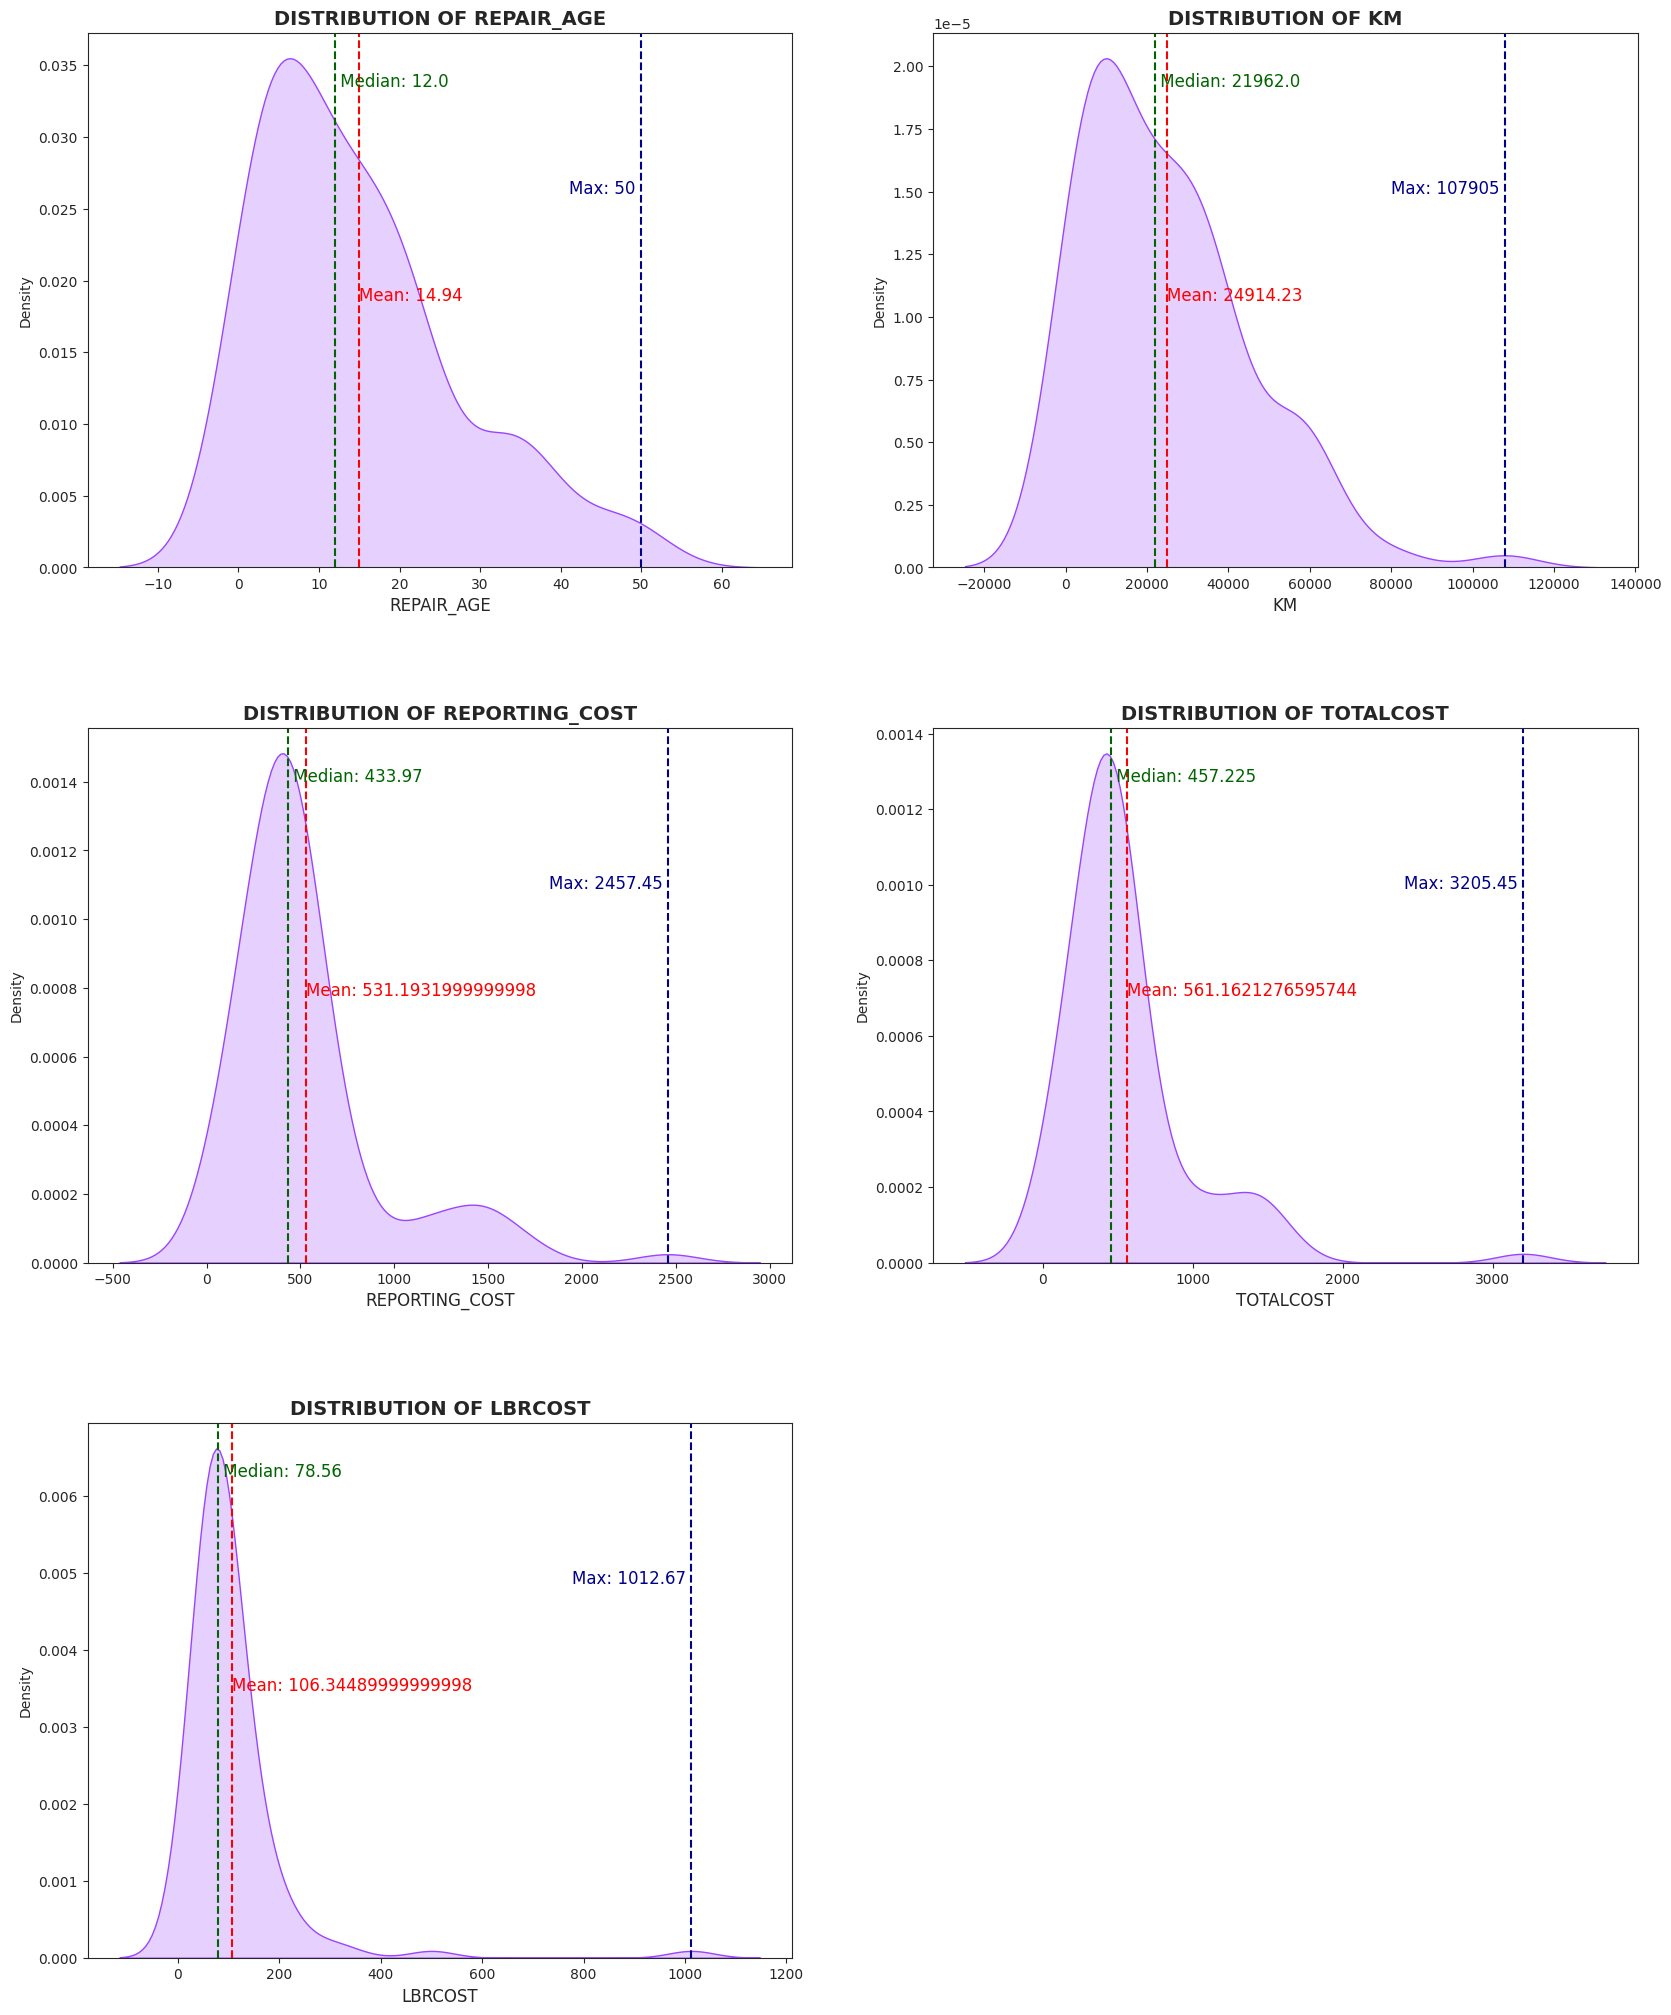

In [17]:
sns.set_style(style = 'ticks')
fig = plt.figure(figsize=(20,25))
spec = fig.add_gridspec(3,2)
spec.update(wspace=0.2, hspace=0.3)

sections = []
for row in range(3):
    for col in range(2):
        sec = fig.add_subplot(spec[row,col])
        sections.append(sec)
count = 0
for feats in num_cols:
    median_val = df[feats].median()
    mean_val = df[feats].mean()
    max_val = df[feats].max()
    ax=sections[count]
    sns.kdeplot(data=df, x=feats, fill = True,color='#9b44fe',ax=ax)

    ax.axvline(median_val, color='darkgreen', linestyle='--')
    ax.text(median_val, ax.get_ylim()[1]*0.9, f' Median: {median_val}', color='darkgreen', fontsize=12, ha='left')

    ax.axvline(max_val, color='darkblue', linestyle='--', label=f'Max: {max_val:.2f}')
    ax.text(max_val, ax.get_ylim()[1]*0.7, f'Max: {max_val} ', color='darkblue', fontsize=12, ha='right')

    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax.text(mean_val, ax.get_ylim()[1]*0.5, f'Mean: {mean_val}', color='red', fontsize=12, ha='left')

    sections[count].set_title('DISTRIBUTION OF '+ feats.upper(), fontweight='bold', fontsize = 14)
    sections[count].set_xlabel(feats, fontsize=12)
    count+=1

if len(num_cols) < len(sections):
    fig.delaxes(sections[len(num_cols)])


plt.show()

## Distribution of categorical features

In [18]:
sns.set_context("talk")
sns.set_style('ticks')

fig = plt.figure(figsize=(25, 120), dpi=200)
spec = fig.add_gridspec(12, 2)
spec.update(wspace=0.25, hspace=1.5)

sections = []
for row in range(12):
    for col in range(2):
        sec = fig.add_subplot(spec[row, col])
        sections.append(sec)

count = 0
for feature in cat_cols:
    ax = sections[count]
    sns.countplot(
        data=df,
        x=feature,
        palette="viridis",
        ax=ax,
        order=df[feature].value_counts().index
    )
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right', fontsize=10)
    ax.tick_params(axis='y', labelsize=9)
    ax.set_title('DISTRIBUTION OF ' + feature.upper(), fontweight='bold', fontsize=18)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(p.get_x() + p.get_width()/2, height/2, f'{int(height)}', ha='center', va='center',fontsize=10, color='white',fontweight='bold')
    count += 1

if len(cat_cols) < len(sections):
    for i in range(len(cat_cols), len(sections)):
        fig.delaxes(sections[i])

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

# Bivariate Analysis

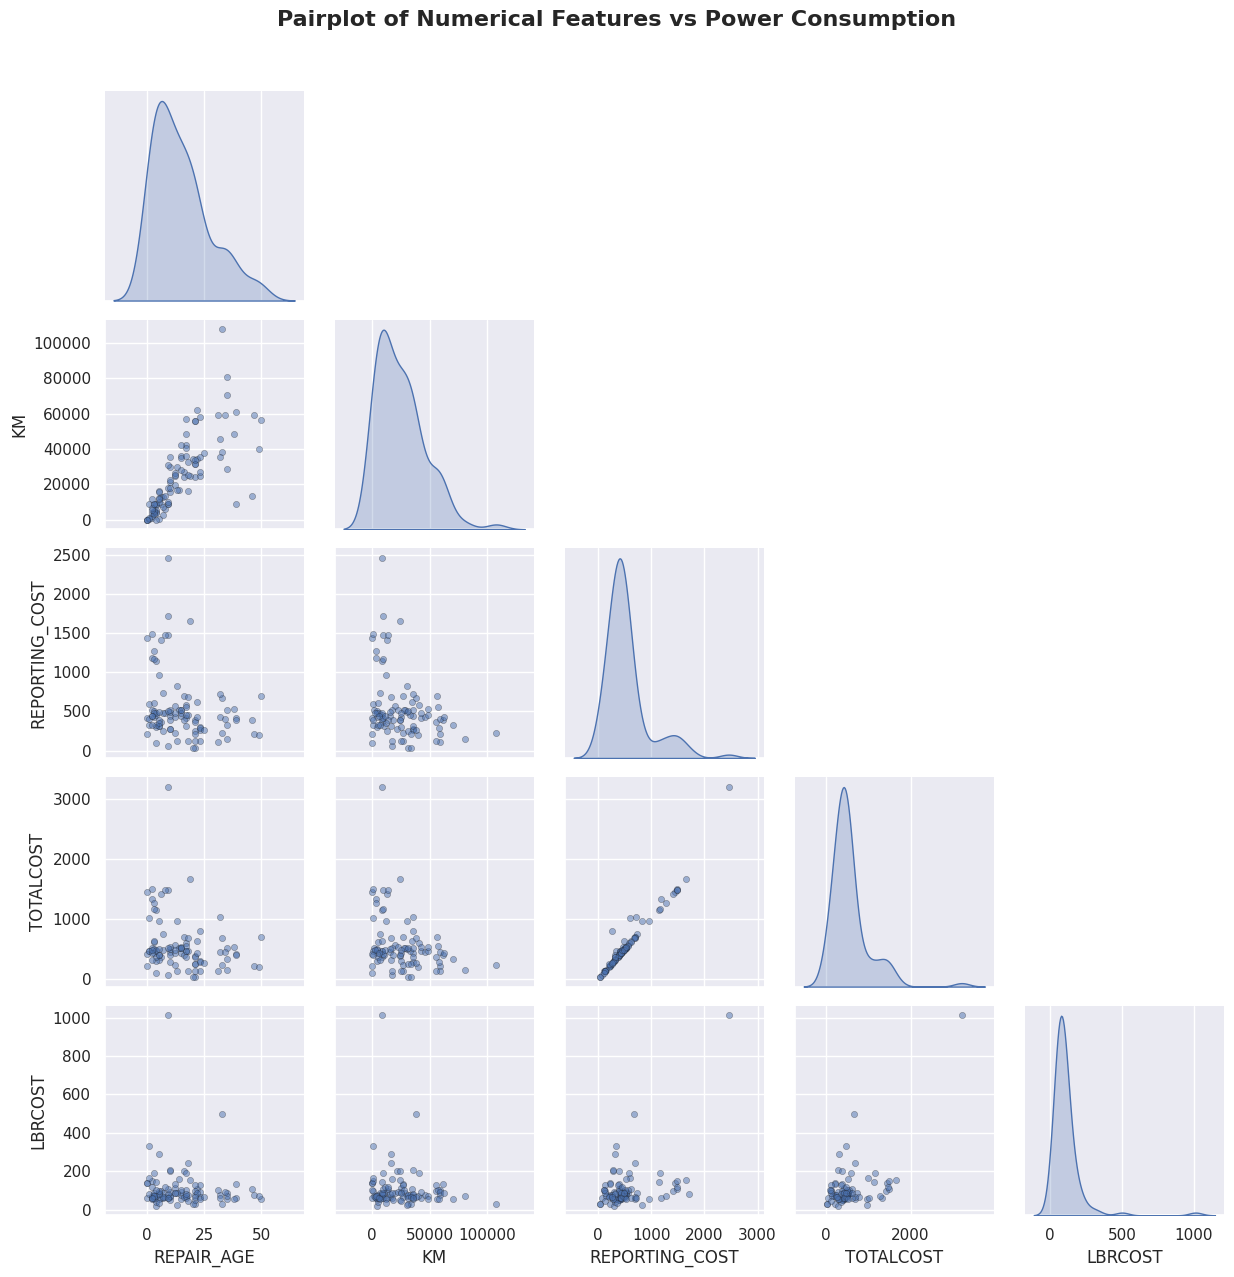

In [19]:
sns.set(context='notebook', palette="deep")

pairplot = sns.pairplot(df[num_cols],diag_kind="kde",corner=True,plot_kws={'alpha': 0.5, 's': 20, 'edgecolor': 'k'})
pairplot.fig.suptitle("Pairplot of Numerical Features vs Power Consumption", y=1.02, fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

# Handling Missing values and Outlier

## Simple Imputation

In [20]:
from sklearn.impute import SimpleImputer
simputer = SimpleImputer(strategy='most_frequent')
cols = ['PLANT','CAUSAL_PART_NM','VEH_TEST_GRP','OPTN_FAMLY_CERTIFICATION','OPTF_FAMLY_EMISSIOF_SYSTEM',
       'ENGINE_SOURCE_PLANT','TRANSMISSION_SOURCE_PLANT','LINE_SERIES','LAST_KNOWN_DELVRY_TYPE_CD']
df_imputed = simputer.fit_transform(df[cols])
df[cols] = pd.DataFrame(data=df_imputed, index=df.index)

In [21]:
cols = ['STATE','REPAIR_DLR_POSTAL_CD','ENGINE_TRACE_NBR','TRANSMISSION_TRACE_NBR']
for i in cols:
    df[i].fillna('Unknown',inplace=True)

In [22]:
# As Total Cost is directly propotional to Reporting Cost, so will fill nan values accordingly.
df.loc[df['TOTALCOST'].isna(), 'TOTALCOST'] = df['REPORTING_COST']

## Box Plots to check Outliers

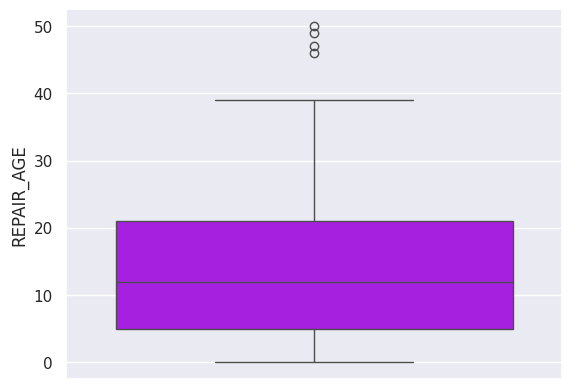

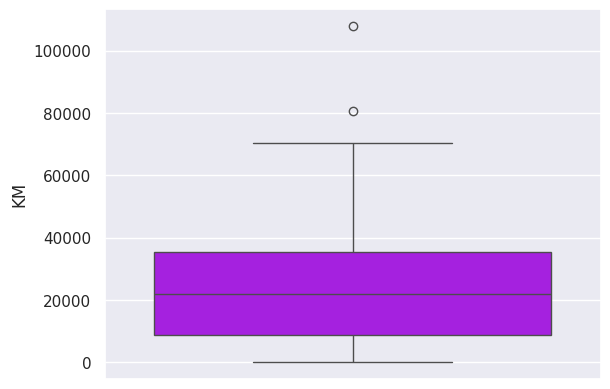

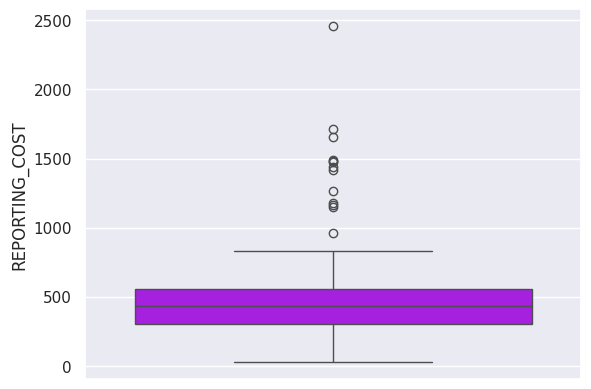

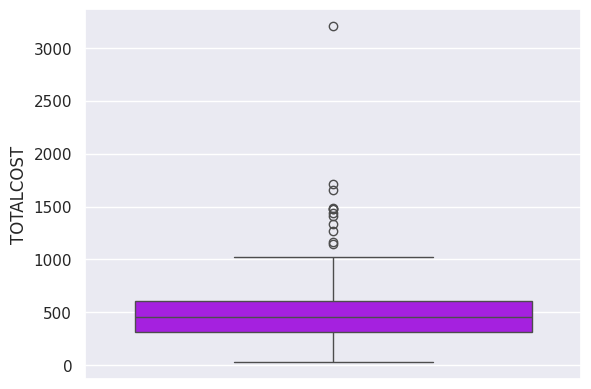

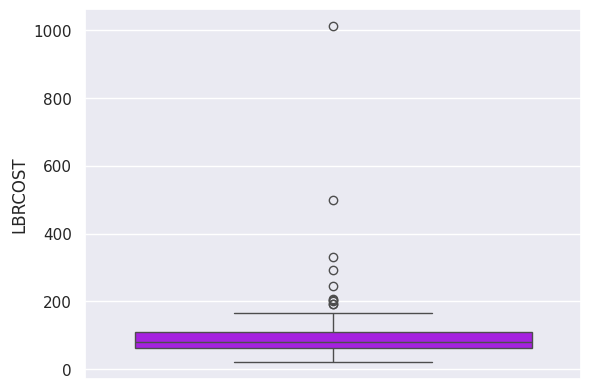

In [23]:
for i in df[num_cols]:
    sns.boxplot(df[i], color='#b102fe')
    plt.show()

## <span style="color:darkred">📌 Observation</span>
- No need for outlier treatement as values are realistic and can be important for model training


# Top 5 Most Critical Columns Insightful For StackHolders (according to my understanding)

**1. CUSTOMER_VERBATIM**
- This free text captures the customer complaint symptom in their own words which helps to know the root cause signals of failure,
  severity cues, and customer sentiment. Even though entries are mostly unique, they contain the structured information you can extract (failure keywords, location in vehicle, etc).

**2. REPAIR DATE**
- One of the most critical column essential for tracking trends over time (trend of failures, seasonality, change after recalls/updates)
  enables time-series and coherent analysis. It is also required to compute lead times, time-between-failures, and lifecycle metrics.

**3. CAUSAL_PART_NM**
- It directly tells which component is failing most often, crucial for warranty cost analysis, spare-parts forecasting, and reliability engineering. It is the primary column for fault attribution.

**4. TOTAL COST**
-This is an important financial metric. Stakeholders in finance and warranty management need to understand the monetary scale of the issue. By summing this column, we can calculate the total warranty cost attributed to steering wheel problems. Correlating cost with PLATFORM or REPAIR_AGE can identify which issues are the most expensive per incident or in aggregate.

**5. VIN**
- Vehicle Identification Number allows linking multiple repairs to the same vehicle to detect repeat failures, cluster problematic vehicles, and tie repairs to production lots. Critical for tracking individual vehicle history and identifying potential manufacturing batches or dates with higher failure rates.

# Text Preprocessing

In [24]:
pd.set_option("display.max_colwidth", None)
df1 = df[["CUSTOMER_VERBATIM", "CORRECTION_VERBATIM"]]

In [25]:
df1

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE."
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!"
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT
4,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE,REPLACED STEERING MESSAGE NO LONGER DISPLAYED
...,...,...
95,CUSTOMER STATES that the steering is very tight and you can hear it rubbing in the steering column when you turn PRA 497110800000,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4
96,cs driver assistance warning light is coming on while driving,replace steering wheel
97,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERING WHEEL COMING APART IN OP CHECK AND ADVISE SOP STEERING WHEEL IN CHECK AND ADVISE,REPLACE STEERING WHEEL PRA 496735300000
98,CUSTOMER STATES THERE IS CLICKING TYPE NOISE COMING FROM STEERING WHEEL WHEN TURNING.E,REMOVED STEERING WHEEL AND DISASSEMBLED AND FOUND SCREW FLOATING AROUND BEHIND COVER REMOVED AND REASSEMBLED AND NOISE IS NO LONGERPRESENT


In [26]:
df1['text'] = df1["CUSTOMER_VERBATIM"].astype(str) + " " + df1['CORRECTION_VERBATIM'].astype(str)

In [27]:
df1.head()

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART REPLACED STEERING WHEEL NOW OKAY
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.","CUSTOMER STATES HEATED STEERING WHEEL INOP CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE."
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!","OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL. APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!"
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL STEERING WHEEL REPLACEMENT
4,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE REPLACED STEERING MESSAGE NO LONGER DISPLAYED


In [28]:
def clean_text(text):
    text = text.lower()  # Make the text lowercase
    text = re.sub('\[.*\]','', text).strip() # Remove text in square brackets
    text = text.translate(str.maketrans('', '', string.punctuation)) # Remove punctuation
    text = re.sub('\S*\d\S*\s*','', text).strip()  # Remove words containing numbers
    return text.strip()

In [29]:
df1['text'] = df1['text'].apply(lambda x: clean_text(x))
df1

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,steering wheel coming apart replaced steering wheel now okay
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",customer states heated steering wheel inop checked found dtcs set in bcm found verifi ed rpo options tested per si was inconclusivetestedperwiring sc hematic all circuits tested ok looks like faulty heated sw module ordered new module replacedheated sw module
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",owner reports the super cruise bar on the steering wheel is coming of f check and advise advisor running pra tool approved for added diagnostics with tcsc to figure out and co mplete programming while replacing the steering wheelassembly rob w olh for open tac case contact tcsc case multiple times and completed drive motorsoftware update programming performed system check as per customers concern steering wheel comi ng apart contacted tac please be aware if a dea ler receives a replacement super cruise steering wheel part number onceinstalled they will need to contact tcsc and request this below applies to and order and replaced steering wheel contacted tcsc many times and also get assistance from fse bill m to co mpleted programming per tcsc programmed drive motor controlmodule prog set up after programming co mpleted performed a drive cycle and check steeringwheel operation op erating normally at this time mileage in mileage out char ge vehicle soon
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT,customer states the lettering and finish on the steering wheel is coming off plant sil steering wheel replacement
4,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,cs customer states the service driver assist system message is on a dvise replaced steering message no longer displayed
...,...,...,...
95,CUSTOMER STATES that the steering is very tight and you can hear it rubbing in the steering column when you turn PRA 497110800000,REPLACED STEERING WHEEL COMPLETEDLOP 0130 TIME .4,customer states that the steering is very tight and you can hear it rubbing in the steering column when you turn pra replaced steering wheel completedlop time
96,cs driver assistance warning light is coming on while driving,replace steering wheel,cs driver assistance warning light is coming on while driving replace steering wheel
97,CUSTOMER STATESCUSTOMER STATES VEHICLE STEERING WHEEL COMING APART IN OP CHECK AND ADVISE SOP STEERING WHEEL IN CHECK AND ADVISE,REPLACE STEERING WHEEL P

In [30]:
df1.head()

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,steering wheel coming apart replaced steering wheel now okay
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",customer states heated steering wheel inop checked found dtcs set in bcm found verifi ed rpo options tested per si was inconclusivetestedperwiring sc hematic all circuits tested ok looks like faulty heated sw module ordered new module replacedheated sw module
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",owner reports the super cruise bar on the steering wheel is coming of f check and advise advisor running pra tool approved for added diagnostics with tcsc to figure out and co mplete programming while replacing the steering wheelassembly rob w olh for open tac case contact tcsc case multiple times and completed drive motorsoftware update programming performed system check as per customers concern steering wheel comi ng apart contacted tac please be aware if a dea ler receives a replacement super cruise steering wheel part number onceinstalled they will need to contact tcsc and request this below applies to and order and replaced steering wheel contacted tcsc many times and also get assistance from fse bill m to co mpleted programming per tcsc programmed drive motor controlmodule prog set up after programming co mpleted performed a drive cycle and check steeringwheel operation op erating normally at this time mileage in mileage out char ge vehicle soon
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT,customer states the lettering and finish on the steering wheel is coming off plant sil steering wheel replacement
4,C/S: CUSTOMER STATES THE SERVICE DRIVER ASSIST SYSTEM MESSAGE IS ON. A DVISE,REPLACED STEERING MESSAGE NO LONGER DISPLAYED,cs customer states the service driver assist system message is on a dvise replaced steering message no longer displayed


In [31]:
lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

# POS tag converter
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatizer_nltk(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [
        lemmatizer.lemmatize(word, get_wordnet_pos(word))
        for word in tokens if word not in stop_words
    ]
    tokens = [word for word in tokens if len(word) >= 3]
    return " ".join(tokens)

df1["lemma"] = df1["text"].apply(lemmatizer_nltk)
df1.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text,lemma
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,steering wheel coming apart replaced steering wheel now okay,steer wheel come apart replace steer wheel okay
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",customer states heated steering wheel inop checked found dtcs set in bcm found verifi ed rpo options tested per si was inconclusivetestedperwiring sc hematic all circuits tested ok looks like faulty heated sw module ordered new module replacedheated sw module,customer state heat steer wheel inop checked found dtcs set bcm found verifi rpo option test per inconclusivetestedperwiring hematic circuit test look like faulty heat module order new module replacedheated module
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",owner reports the super cruise bar on the steering wheel is coming of f check and advise advisor running pra tool approved for added diagnostics with tcsc to figure out and co mplete programming while replacing the steering wheelassembly rob w olh for open tac case contact tcsc case multiple times and completed drive motorsoftware update programming performed system check as per customers concern steering wheel comi ng apart contacted tac please be aware if a dea ler receives a replacement super cruise steering wheel part number onceinstalled they will need to contact tcsc and request this below applies to and order and replaced steering wheel contacted tcsc many times and also get assistance from fse bill m to co mpleted programming per tcsc programmed drive motor controlmodule prog set up after programming co mpleted performed a drive cycle and check steeringwheel operation op erating normally at this time mileage in mileage out char ge vehicle soon,owner report super cruise bar steer wheel come check advise advisor run pra tool approve add diagnostics tcsc figure mplete program replace steer wheelassembly rob olh open tac case contact tcsc case multiple time complete drive motorsoftware update program perform system check per customer concern steer wheel comi apart contact tac please aware dea ler receives replacement super cruise steer wheel part number onceinstalled need contact tcsc request applies order replace steer wheel contact tcsc many time also get assistance fse bill mpleted program per tcsc programmed drive motor controlmodule prog set program mpleted perform drive cycle check steeringwheel operation erating normally time mileage mileage char vehicle soon
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT,customer states the lettering and finish on t

In [32]:
df1["lemma"] = df1["text"].apply(lemmatizer_nltk)
df1.head()

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text,lemma
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,steering wheel coming apart replaced steering wheel now okay,steer wheel come apart replace steer wheel okay
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",customer states heated steering wheel inop checked found dtcs set in bcm found verifi ed rpo options tested per si was inconclusivetestedperwiring sc hematic all circuits tested ok looks like faulty heated sw module ordered new module replacedheated sw module,customer state heat steer wheel inop checked found dtcs set bcm found verifi rpo option test per inconclusivetestedperwiring hematic circuit test look like faulty heat module order new module replacedheated module
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",owner reports the super cruise bar on the steering wheel is coming of f check and advise advisor running pra tool approved for added diagnostics with tcsc to figure out and co mplete programming while replacing the steering wheelassembly rob w olh for open tac case contact tcsc case multiple times and completed drive motorsoftware update programming performed system check as per customers concern steering wheel comi ng apart contacted tac please be aware if a dea ler receives a replacement super cruise steering wheel part number onceinstalled they will need to contact tcsc and request this below applies to and order and replaced steering wheel contacted tcsc many times and also get assistance from fse bill m to co mpleted programming per tcsc programmed drive motor controlmodule prog set up after programming co mpleted performed a drive cycle and check steeringwheel operation op erating normally at this time mileage in mileage out char ge vehicle soon,owner report super cruise bar steer wheel come check advise advisor run pra tool approve add diagnostics tcsc figure mplete program replace steer wheelassembly rob olh open tac case contact tcsc case multiple time complete drive motorsoftware update program perform system check per customer concern steer wheel comi apart contact tac please aware dea ler receives replacement super cruise steer wheel part number onceinstalled need contact tcsc request applies order replace steer wheel contact tcsc many time also get assistance fse bill mpleted program per tcsc programmed drive motor controlmodule prog set program mpleted perform drive cycle check steeringwheel operation erating normally time mileage mileage char vehicle soon
3,CUSTOMER STATES THE LETTERING AND FINISH ON THE STEERING WHEEL IS COMING OFF. Plant: SIL,STEERING WHEEL REPLACEMENT,customer states the lettering and finish on t

In [33]:
# !pip install wordcloud

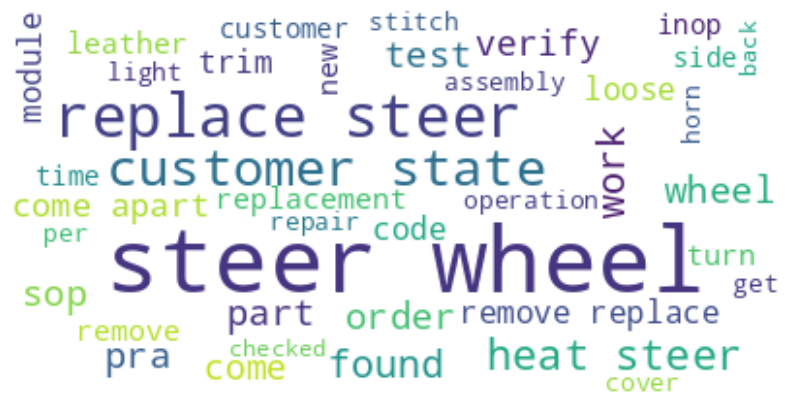

In [34]:
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

# Generate wordcloud from your lemma column
wordcloud = WordCloud(stopwords=stop_words, max_words=40, background_color="white").generate(" ".join(df1['lemma'].astype(str)))

# Plot
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
#Find the top unigrams,bigrams and trigrams by frequency among all the complaints after processing the text.

In [36]:
def get_top_n_bigram(text, ngram=1, top=None):
    vec = CountVectorizer(ngram_range=(ngram, ngram), stop_words='english').fit(text)
    bag_of_words = vec.transform(text)

    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top]

In [37]:
top_30_unigrams = get_top_n_bigram(df1.lemma,ngram=1, top=30)
top_30_bigrams = get_top_n_bigram(df1.lemma,ngram=2, top=30)
top_30_trigrams = get_top_n_bigram(df1.lemma,ngram=3, top=30)

In [38]:
#Print the top 10 words in the unigram frequency
print('Top 30 unigrams:\n')
top_30_unigrams[:30]

Top 30 unigrams:



[('steer', 224),
 ('wheel', 224),
 ('replace', 80),
 ('customer', 66),
 ('state', 59),
 ('heat', 37),
 ('come', 31),
 ('remove', 27),
 ('work', 23),
 ('pra', 20),
 ('sop', 20),
 ('test', 19),
 ('order', 19),
 ('apart', 17),
 ('check', 17),
 ('verify', 16),
 ('module', 14),
 ('code', 14),
 ('trim', 14),
 ('loose', 14),
 ('new', 13),
 ('replacement', 13),
 ('turn', 13),
 ('leather', 13),
 ('inop', 12),
 ('advise', 12),
 ('time', 12),
 ('concern', 12),
 ('cruise', 11),
 ('operation', 11)]

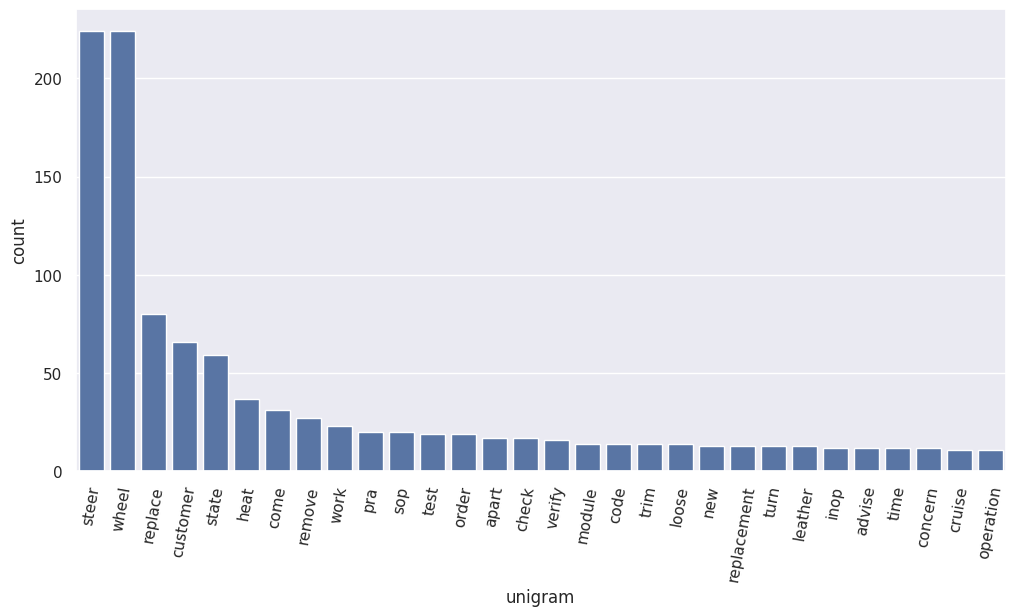

In [39]:
df2 = pd.DataFrame(top_30_unigrams, columns = ['unigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df2['unigram'], y=df2['count'])
plt.xticks(rotation = 80)
plt.show()

In [40]:
#Print the top 10 words in the bigram frequency
print('Top 30 bigrams:\n')
top_30_bigrams[:30]

Top 30 bigrams:



[('steer wheel', 203),
 ('replace steer', 64),
 ('customer state', 47),
 ('heat steer', 28),
 ('state steer', 19),
 ('come apart', 15),
 ('remove replace', 14),
 ('wheel come', 13),
 ('state heat', 9),
 ('super cruise', 8),
 ('check advise', 8),
 ('wheel inop', 7),
 ('customer concern', 7),
 ('cust state', 7),
 ('wheel assembly', 7),
 ('air bag', 7),
 ('wheel leather', 7),
 ('wheel replacement', 6),
 ('state stitch', 6),
 ('sop replace', 6),
 ('replace heat', 5),
 ('wheel cover', 5),
 ('order replace', 4),
 ('wheel switch', 4),
 ('access remove', 4),
 ('new steer', 4),
 ('wheel loose', 4),
 ('wheel work', 4),
 ('order steer', 4),
 ('stitch steer', 4)]

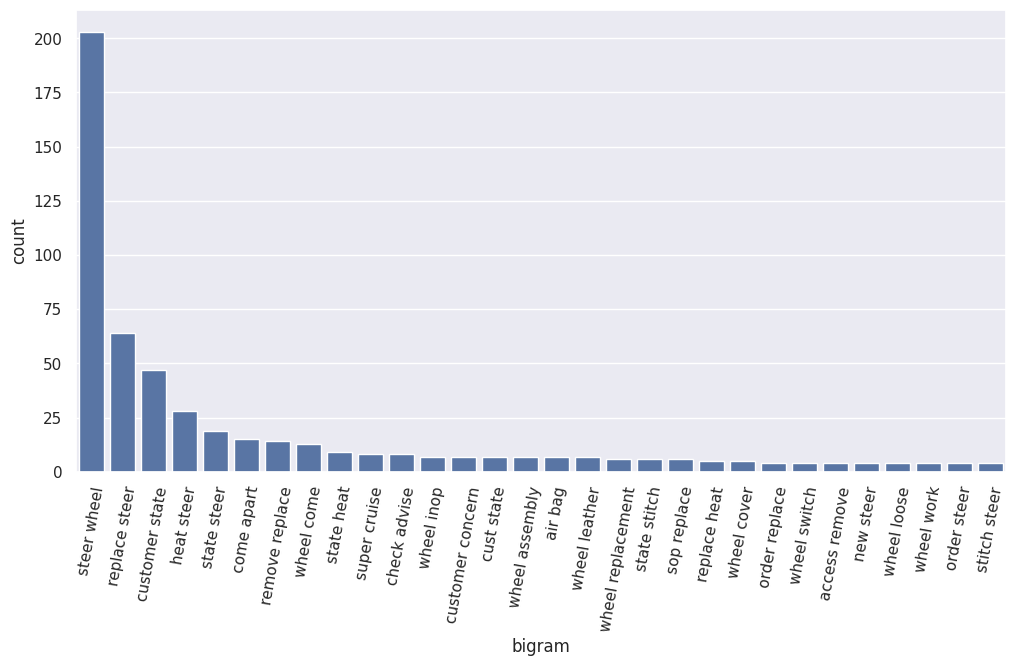

In [41]:
#Plot graph for the top 30 words in the bigram frequency
df3 = pd.DataFrame(top_30_bigrams, columns = ['bigram' , 'count'])
plt.figure(figsize=(12,6))
fig = sns.barplot(x=df3['bigram'], y=df3['count'])
plt.xticks(rotation = 80)
plt.show()

In [42]:
component_keywords = [
    "steer", "wheel", "module", "trim", "leather", "air bag", "assembly", "cover", "switch",
    "steer wheel", "wheel assembly", "wheel cover", "wheel switch", "wheel leather"
]

failure_keywords = [
    "loose", "inop", "apart", "code", "concern", "stitch", "heat", "operation",
    "come apart", "state heat", "state stitch", "heat steer", "wheel inop"
]

action_keywords = [
    "replace", "remove", "check", "verify", "test", "order", "advise", "new", "ok",
     "replace steer", "remove replace", "sop replace", "order replace",
    "check advise", "access remove", "order steer", "new steer"
]

def extract_tags(text):
    tags = {"Component": [], "Failure": [], "Action": [], "Other": []}
    for word in component_keywords:
        if word in text:
            tags["Component"].append(word.title())
    for word in failure_keywords:
        if word in text:
            tags["Failure"].append(word.title())
    for word in action_keywords:
        if word in text:
            tags["Action"].append(word.title())
    return {k: v for k, v in tags.items() if v}


df1["tags"] = df1["lemma"].apply(extract_tags)

demo = df1[["CORRECTION_VERBATIM", "CUSTOMER_VERBATIM", "tags"]].head(10)

In [43]:
df1

,CUSTOMER_VERBATIM,CORRECTION_VERBATIM,text,lemma,tags
0,STEERING WHEEL COMING APART,REPLACED STEERING WHEEL NOW OKAY,steering wheel coming apart replaced steering wheel now okay,steer wheel come apart replace steer wheel okay,"{'Component': ['Steer', 'Wheel', 'Steer Wheel'], 'Failure': ['Apart', 'Come Apart'], 'Action': ['Replace', 'Ok', 'Replace Steer']}"
1,CUSTOMER STATES HEATED STEERING WHEEL INOP,"CHECKED - FOUND DTC'S U0229 - U1530 SET IN BCM. FOUND PIP5883J, VERIFI ED RPO OPTIONS. TESTED PER SI - WAS INCONCLUSIVE.TESTEDPERWIRING SC HEMATIC - ALL CIRCUITS TESTED OK. LOOKS LIKE FAULTY HEATED S-W MODULE. ORDERED NEW MODULE 9-26-23.1-2, REPLACEDHEATED S-W MODULE.",customer states heated steering wheel inop checked found dtcs set in bcm found verifi ed rpo options tested per si was inconclusivetestedperwiring sc hematic all circuits tested ok looks like faulty heated sw module ordered new module replacedheated sw module,customer state heat steer wheel inop checked found dtcs set bcm found verifi rpo option test per inconclusivetestedperwiring hematic circuit test look like faulty heat module order new module replacedheated module,"{'Component': ['Steer', 'Wheel', 'Module', 'Steer Wheel'], 'Failure': ['Inop', 'Heat', 'State Heat', 'Heat Steer', 'Wheel Inop'], 'Action': ['Replace', 'Check', 'Test', 'Order', 'New', 'Ok']}"
2,OWNER REPORTS: THE SUPER CRUISE BAR ON THE STEERING WHEEL IS COMING OF F. CHECK AND ADVISE. ADVISOR RUNNING PRA TOOL.,"APPROVED 4.9(OLH) FOR ADDED DIAGNOSTICS WITH TCSC TO FIGURE OUT AND CO MPLETE PROGRAMMING WHILE REPLACING THE STEERING WHEELASSEMBLY. ROB W. 1-2-24 3-31PM OLH FOR OPEN TAC CASE, CONTACT TCSC CASE # 9-1156925877 4 MULTIPLE TIMES AND COMPLETED DRIVE MOTORSOFTWARE UPDATE PROGRAMMING . PERFORMED SYSTEM CHECK AS PER CUSTOMERS CONCERN, STEERING WHEEL COMI NG APART. CONTACTED TAC CASE#9-11503916151 "" PLEASE BE AWARE IF A DEA LER RECEIVES A REPLACEMENT SUPER CRUISE STEERING WHEEL PART NUMBER 850 13816. ONCEINSTALLED THEY WILL NEED TO CONTACT TCSC AND REQUEST THIS BELOW. APPLIES TO 2023 AND 2024. ORDER AND REPLACED STEERING WHEEL, CONTACTED TCSC MANY TIMES AND ALSO GET ASSISTANCE FROM FSE BILL M. TO CO MPLETED PROGRAMMING. PER TCSC PROGRAMMED DRIVE MOTOR CONTROLMODULE 1 WCC-FDYZ196959052 PROG, SET UP WCC-0SYY196956992. AFTER PROGRAMMING CO MPLETED PERFORMED A DRIVE CYCLE AND CHECK STEERINGWHEEL OPERATION, OP ERATING NORMALLY AT THIS TIME. MILEAGE IN 5522, MILEAGE OUT 5532. CHAR GE VEHICLE SOON!!!",owner reports the super cruise bar on the steering wheel is coming of f check and advise advisor running pra tool approved for added diagnostics with tcsc to figure out and co mplete programming while replacing the steering wheelassembly rob w olh for open tac case contact tcsc case multiple times and completed drive motorsoftware update programming performed system check as per customers concern steering wheel comi ng apart contacted tac please be aware if a dea ler receives a replacement super cruise steering wheel part number onceinstalled they will need to contact tcsc and request this below applies to and order and replaced steering wheel contacted tcsc many times and also get assistance from fse bill m to co mpleted programming per tcsc programmed drive motor controlmodule prog set up after programming co mpleted performed a drive cycle and check steeringwheel operation op erating normally at this time mileage in mileage out char ge vehicle soon,owner report super cruise bar steer wheel come check advise advisor run pra tool approve add diagnostics tcsc figure mplete program replace steer wheelassembly rob olh open tac case contact tcsc case multiple time complete drive motorsoftware update program perform system check per customer concern steer wheel comi apart contact tac please aware dea ler receives replacement super cruise steer wheel part number onceinstalled need contact tcsc request applies order replace steer wheel contact tcsc many time also get assistance fse bill mpleted program per tcsc

# Saving the dataframe in csv

In [44]:
df.to_csv('Taggeddata_task2.csv', index=False)